-------------------------------------
> ***Name:*** Mubanga Nsofu <br>
> ***Learner Id:*** 149050 <br>
> ***Course:*** BAN6800 (Business Analytics Capstone) <br>
> ***Milestone One:*** Dataset Explatory Data Analysis and Preparation <br>
> ***Lecturer:*** Professor Raphael Wanjiku <br>
> ***Institution:*** Nexford University <br>
> ***Date:*** 24th May 2025

-------------------------------------------
> ***Introduction*** <br>

> Takealot is an e-commerce company headquartered in Cape Town, South Africa, founded in 2011 by Kim Reid (Wikipedia, 2025). The company caters to South African online shoppers and has been the dominant player for the last 14 years. Amazon, the global online giant, recently entered the South African market (Fintechnews Africa, 2024). Amazon’s strong brand reputation, advanced analytics, data-driven approach and technology threaten Takealot’s market share and dominance.  

> One of Takealot’s weaknesses is the lack of diagnostic and predictive analytics capabilities that provide detailed insight into customer purchasing behaviour. Without actionable insights, Takealot cannot optimise marketing budgets, retain customers and protect market share. This notebook prepares the dataset for subsequent data modeling using Machine Learning to segment customer purchasing behavioural patterns and predict purchasing intent. 

> This final outcome of the project in Week 6 will culminate in improved customer engagement, an increase in conversion rates and customer retention through personalised recommendations.




----------------
> Import libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns # 
import sweetviz # for automated EDA tasks like Feature Analysis, Target variable Analysis, Correlation etc 


--------------
> Import the dataset

In [2]:
# Load the dataset
file_path = 'online_shoppers_intention.csv'
data = pd.read_csv(file_path)

In [3]:
# Use ggplot style adapated from R (Hadley Wickam)
plt.style.use('ggplot')

-------------------------------------------
> View structure and summary of the dataset using Pandas

In [4]:
data.info()
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,2.124006,2.357097,3.147364,4.069586
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,0.911325,1.717277,2.401591,4.025169
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157214,0.016813,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


-------------------------
> Checking for class imbalance in Revenue

In [5]:
data['Revenue'].value_counts()

Revenue
False    10422
True      1908
Name: count, dtype: int64

----------------
> Generate paired plots using seaborn

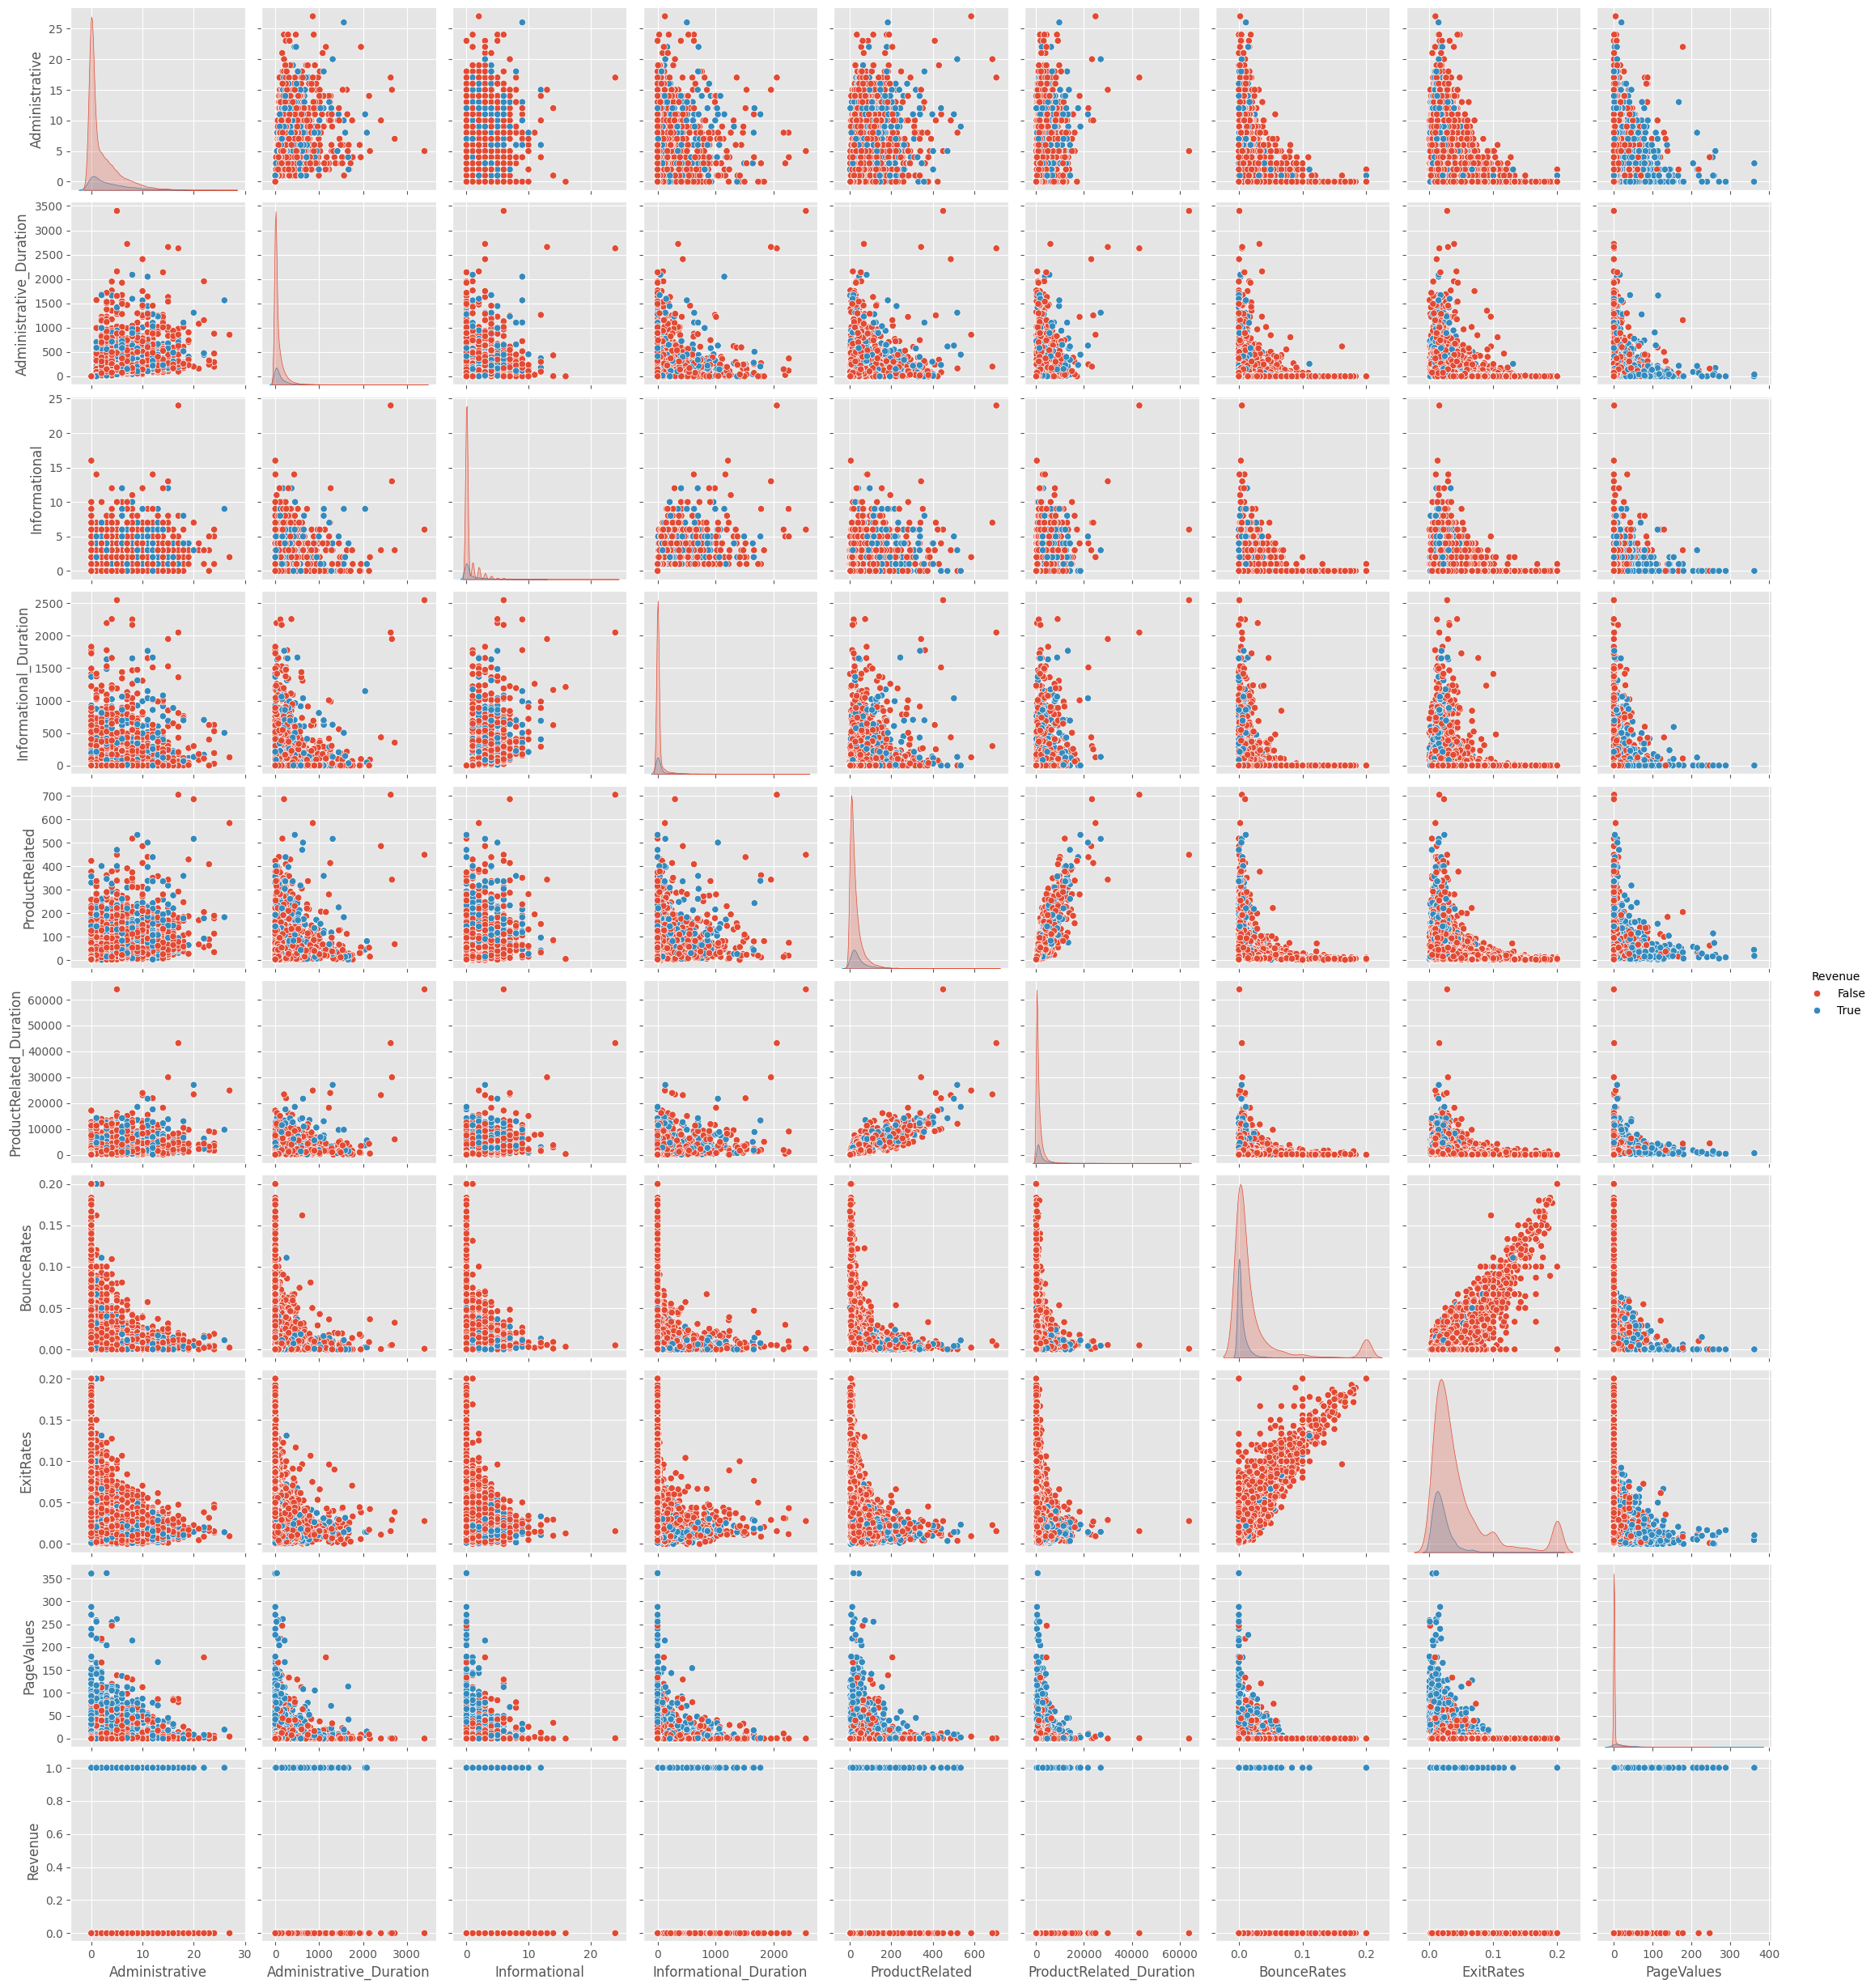

In [7]:
# Select numeric columns, excluding bool and object types
numeric_cols = data.select_dtypes(include=["int64", "float64"]).columns.tolist()

# Add 'Revenue' to the list if not already included
if "Revenue" not in numeric_cols:
    numeric_cols.append("Revenue")

# Limit to first 9 numeric features (excluding 'Revenue')
selected_features = numeric_cols[:9]

# Ensure 'Revenue' is the hue
plot_features = selected_features + ["Revenue"]

# Create the pairplot
sns.pairplot(data[plot_features],
             x_vars=selected_features,
             y_vars=plot_features,
             hue="Revenue")


--------------
> Alternatively perform EDA using SweetViz library which is an automated approach. SweetViz can help to know what the distribution of different data variables what are categoricals and continuous columns minimum maximum values missing data values for relation

In [8]:
# check version of SweetViz
print("SweetViz Version : {}" .format(sweetviz.__version__))

SweetViz Version : 2.3.1


In [9]:
report = sweetviz.analyze(data)

Done! Use 'show' commands to display/save.   |██████████| [100%]   00:00 -> (00:00 left)


In [10]:
report.show_html()

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


----------------
> Data Cleaning

In [6]:
# Convert boolean to int
data['Revenue'] = data['Revenue'].astype(int)
data['Weekend'] = data['Weekend'].astype(int)


# Encode 'Month' using ordinal encoding
month_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'June', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
month_mapping = {month: idx+1 for idx, month in enumerate(month_order)}
data['Month'] = data['Month'].map(month_mapping)



In [ ]:
# Encode 'VisitorType' using one-hot encoding (drop_first to avoid multicollinearity)
data = pd.get_dummies(data, columns=['VisitorType'], drop_first=True)
# Convert Boolean columns to 0/1 integers
# VisitorType_Other → 1 if "Other", else 0
# VisitorType_Returning_Visitor → 1 if "Returning_Visitor", else 0
# If both are 0, the visitor is a "New_Visitor" (the dropped baseline)

for col in ['VisitorType_Other', 'VisitorType_Returning_Visitor']:
    if col in data.columns:
        data[col] = data[col].astype(int)


In [8]:
data

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,Weekend,Revenue,VisitorType_Other,VisitorType_Returning_Visitor
0,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,2,1,1,1,1,0,0,0,1
1,0,0.0,0,0.0,2,64.000000,0.000000,0.100000,0.000000,0.0,2,2,2,1,2,0,0,0,1
2,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,2,4,1,9,3,0,0,0,1
3,0,0.0,0,0.0,2,2.666667,0.050000,0.140000,0.000000,0.0,2,3,2,2,4,0,0,0,1
4,0,0.0,0,0.0,10,627.500000,0.020000,0.050000,0.000000,0.0,2,3,3,1,4,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,3,145.0,0,0.0,53,1783.791667,0.007143,0.029031,12.241717,0.0,12,4,6,1,1,1,0,0,1
12326,0,0.0,0,0.0,5,465.750000,0.000000,0.021333,0.000000,0.0,11,3,2,1,8,1,0,0,1
12327,0,0.0,0,0.0,6,184.250000,0.083333,0.086667,0.000000,0.0,11,3,2,1,13,1,0,0,1
12328,4,75.0,0,0.0,15,346.000000,0.000000,0.021053,0.000000,0.0,11,2,2,3,11,0,0,0,1


------------
> Feature Engineering

In [9]:

data['Total_Duration'] = data['Administrative_Duration'] + data['Informational_Duration'] + data['ProductRelated_Duration']
data['Interaction_Intensity'] = data['PageValues'] / (data['ProductRelated_Duration'] + 1e-5)  # avoid division by zero

----------------
> View some plots after cleaning dataset


> Purchase Distribution


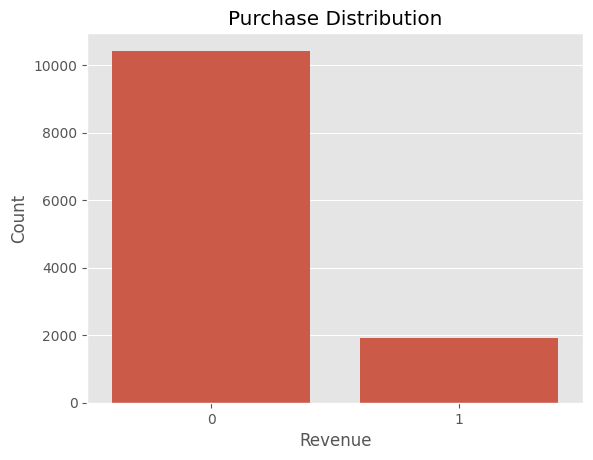

In [10]:
sns.countplot(x='Revenue', data=data)
plt.title('Purchase Distribution')
plt.xlabel('Revenue')
plt.ylabel('Count')
plt.show()

1. The revenue variable is imbalanced. This will need to be dealt with during classification
2. Most sessions do not result in a purchase, this is the Majority class (Revenue = 0)
3. The minority class (Revenue = 1)is a much smaller subset of sessions do result in a purchase (approximately 15%).


> Correlation Heatmap using Seaborn

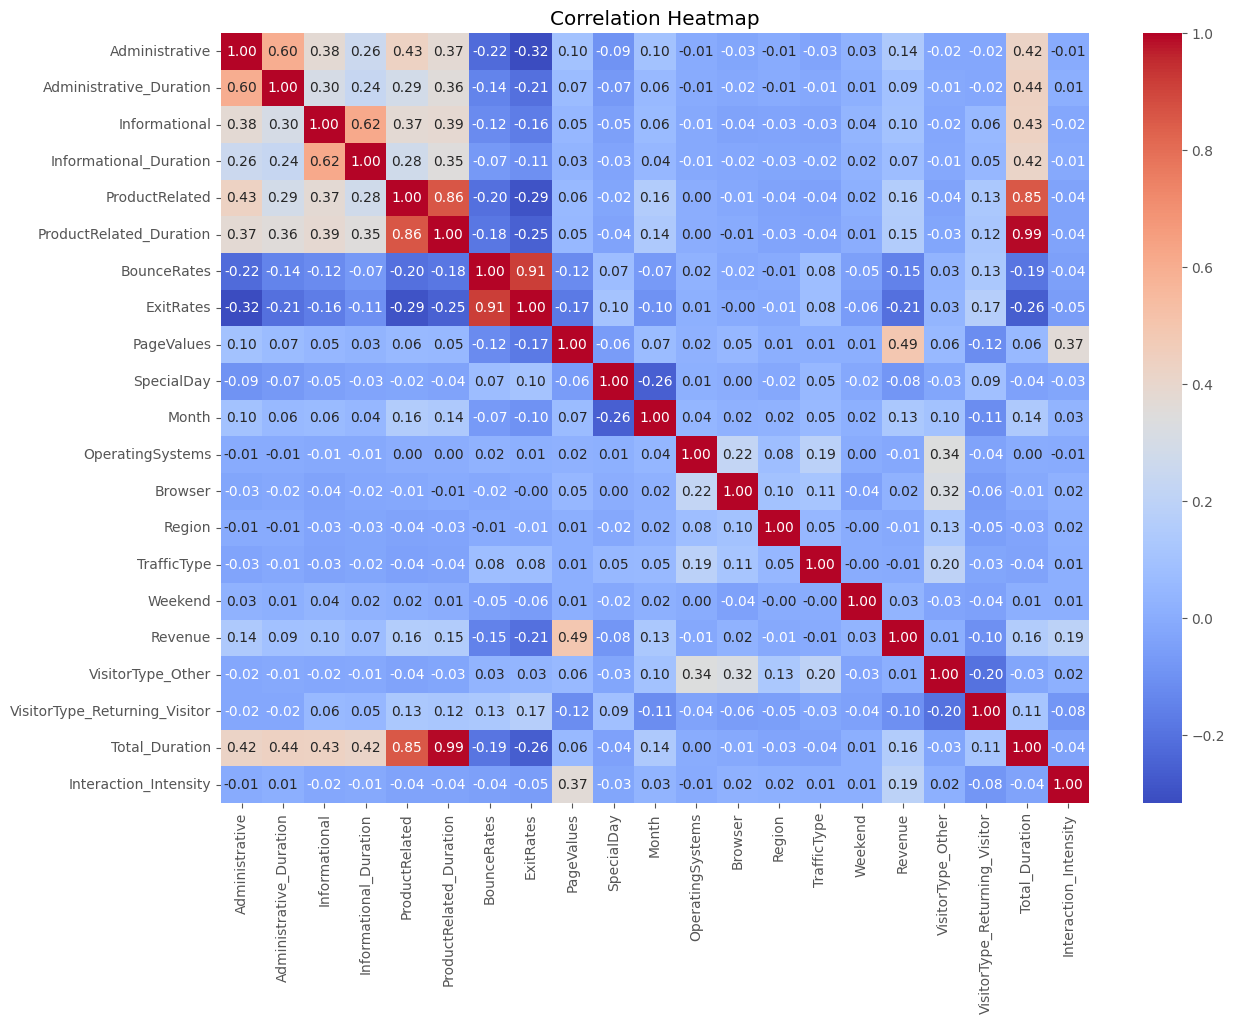

In [11]:
plt.figure(figsize=(14,10))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

1. The plot above shows Highly Correlated Feature Pairs (Strong Relationships) which we can drop later on when modeling. For example ProductRelated and	ProductRelated_Duration (0.86), ProductRelated	and Total_Duration (0.85),	ProductRelated_Duration	Total_Duration (0.99). 

2. The Features OperatingSystems, Browser, Region, TrafficType, Weekend show correlations near 0.00 with Revenue, these can be dropped from clustering and classification to improve the quality of the models

3. ProductRelated_Duration, Total_Duration, and ProductRelated are heavily correlated (0.85–0.99), keeping only one will avoid redundancy, reduce compute time and prevent multicollinearity 


> Boxplot of page values by purchase outcome

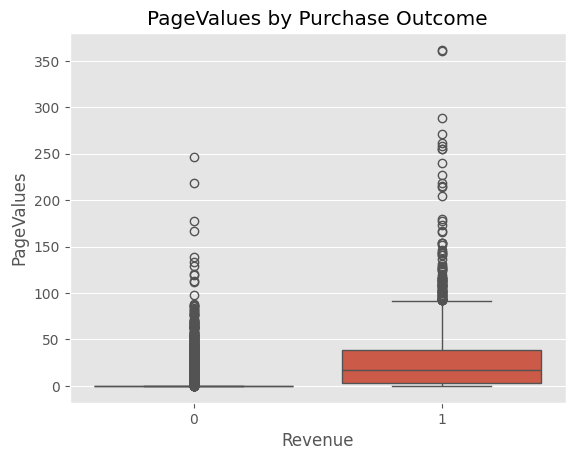

In [12]:
sns.boxplot(x='Revenue', y='PageValues', data=data)
plt.title('PageValues by Purchase Outcome')
plt.show()

1. The boxplot shows users who converted (Revenue = 1) had consistently higher PageValues.
2. The median PageValue for Revenue = 1 is significantly higher than for Revenue = 0.
3. For non-converting users, PageValues are heavily concentrated around zero, with a large portion of these sessions likely had minimal interaction with meaningful product content.
4. Both categories have extreme outliers, but purchases have higher and more frequent outliers. This suggests that even among those who didn’t purchase, a small number had high PageValues—possibly abandoned carts or last-minute dropouts.


> Histogram of interaction intensity

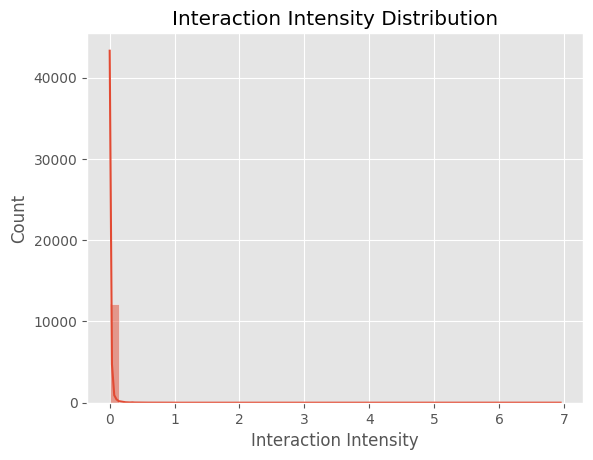

In [13]:
sns.histplot(data['Interaction_Intensity'], bins=50, kde=True)
plt.title('Interaction Intensity Distribution')
plt.xlabel('Interaction Intensity')
plt.show()

1. The long tail suggests a small group of users are highly engaged (e.g., repeated or prolonged interaction with products).
2. There is a very high concentration of sessions have an Interaction Intensity near zero. This could mean most users spend little time on product-related pages, or view product pages with very low engagement rates (i.e., fast browsing or skimming behavior).

-------------------
> Save Cleaned Dataset as CSV file

In [14]:
data.to_csv("online_shoppers_intention_cleaned_file.csv", index=False)